In [241]:
# Importamos las librerías
%matplotlib inline
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re
#importamos Plotly express
import plotly.express as px
#importamos Plotly 
import matplotlib.pyplot as plt
#importamos Seaborn
import seaborn as sns
#importamos ip widget
from ipywidgets import interact_manual
#importamos modelos lineales
from sklearn import linear_model
#importamos modelos R2score
from sklearn.metrics import r2_score
#importamos train_test_split
from sklearn.model_selection import train_test_split
#importamos metrics
from sklearn import metrics
#importamos herramientas de normalizacion
from sklearn import preprocessing


In [242]:
#importacion base de datos#
df = pd.read_csv("../Data/properati_train.csv", sep=",")

#print tipo de datos
print(df.dtypes)

#ejemplo primeros tres
df.head(3)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
counter     

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,pileta,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NO,NO,NO,NO,NO,2.0,2.0,55.0,1127.272727,Mataderos
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NO,NO,NO,NO,NO,2.0,2.0,55.0,1309.090909,Mataderos
2,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NO,NO,NO,NO,NO,NaN,0.0,35.0,1828.571429,Mar del Plata Centro


In [243]:
#Simplificamos los amenities de parrilla, gimnasio y jardin en una unica columna de tiene o no tiene amenities
df["amenities"] = df["parrilla"]  
amenities_1 = df["pileta"] =="SI"
df.loc[amenities_1, "amenities"] = "SI"
amenities_2 = df["gym"] =="SI"
df.loc[amenities_2, "amenities"] = "SI"
amenities_3 = df["jardin"] =="SI"
df.loc[amenities_3, "amenities"] = "SI"

df

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,amenities
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NO,NO,NO,NO,2.0,2.0,55.0,1127.272727,Mataderos,NO
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NO,NO,NO,NO,2.0,2.0,55.0,1309.090909,Mataderos,NO
2,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NO,NO,NO,NO,NaN,0.0,35.0,1828.571429,Mar del Plata Centro,NO
3,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,NO,NO,NO,NO,NaN,0.0,106.0,1226.415094,Munro,NO
4,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,NO,NO,NO,NO,1.0,1.0,45.0,3066.666667,Belgrano,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,NO,SI,SI,NO,NaN,0.0,113.0,7699.115044,Belgrano,SI
92709,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,NO,SI,SI,SI,NaN,0.0,360.0,1383.333333,Beccar,SI
92710,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,NO,SI,NO,NO,1.0,1.0,46.0,2858.695652,Villa Urquiza,SI
92711,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,NO,NO,NO,NO,2.0,2.0,48.0,1997.916667,Mar del Plata Plaza Colón,NO


In [244]:
#filtro por region y drop del state_name
df_pais = df.drop(["state_name"], axis=1)
#query de provincias que no son buenos aires y caba
df_provincias = df.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')
df_provincias = df.drop(["state_name"], axis=1)
#query de provincias que son buenos aires y caba
df_baires = df.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
df_baires = df_baires.drop(["state_name"], axis=1)
#query de caba
df_caba = df.query(' state_name == "Capital Federal"')
df_caba = df_caba.drop(["state_name"], axis=1)
#query de BsAs Sur
df_bsas_sur = df.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
df_bsas_sur = df_bsas_sur.drop(["state_name"], axis=1)
#query de BsAs Costa
df_bsas_costa = df.query(' state_name == "Buenos Aires Costa Atlántica"')
df_bsas_costa = df_bsas_costa.drop(["state_name"], axis=1)
#query de BsAs Norte
df_bsas_norte = df.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
df_bsas_norte = df_bsas_norte.drop(["state_name"], axis=1)
#query de BsAs Oeste
df_bsas_oeste = df.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
df_bsas_oeste = df_bsas_oeste.drop(["state_name"], axis=1)
#query de BsAs Interior
df_bsas_interior = df.query(' state_name == "Buenos Aires Interior"')
df_bsas_interior = df_bsas_interior.drop(["state_name"], axis=1)
#df_pais.to_csv("../Data/properati_train_prueba_pais.csv", index=False)

df_caba

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,...,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,amenities
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,NO,NO,NO,NO,2.0,2.0,55.0,1127.272727,Mataderos,NO
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,NO,NO,NO,NO,2.0,2.0,55.0,1309.090909,Mataderos,NO
4,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,NO,NO,NO,NO,1.0,1.0,45.0,3066.666667,Belgrano,NO
5,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,NO,NO,NO,NO,2.0,2.0,65.0,3000.000000,Belgrano,NO
8,13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,3430234.0,NaN,NaN,NaN,...,NO,NO,NO,NO,3.0,1.0,50.0,2234.000000,Palermo Soho,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,...,NO,NO,NO,NO,NaN,0.0,157.0,2611.464968,Belgrano,NO
92707,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,...,NO,NO,NO,NO,NaN,0.0,157.0,2611.464968,Belgrano,NO
92708,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,...,NO,SI,SI,NO,NaN,0.0,113.0,7699.115044,Belgrano,SI
92710,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,...,NO,SI,NO,NO,1.0,1.0,46.0,2858.695652,Villa Urquiza,SI


Analizaremos de menor a mayor cantidad de datos, iniciando por la division que realizamos en la entrega n° 1 
# 1. CABA


In [379]:
#generamos Dummies por cada variable cualitativas
df_caba_dummies = pd.get_dummies(data=df_caba,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_caba_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,2.0,2.0,55.0,1127.272727,Mataderos,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,2.0,2.0,55.0,1309.090909,Mataderos,1,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,1.0,1.0,45.0,3066.666667,Belgrano,1,0,0,0,0
5,8,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,...,2.0,2.0,65.0,3000.000000,Belgrano,1,0,0,0,0
8,13,sell,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,3430234.0,NaN,NaN,NaN,111700.0,...,3.0,1.0,50.0,2234.000000,Palermo Soho,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,121160,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,410000.0,...,NaN,0.0,157.0,2611.464968,Belgrano,1,0,0,0,0
92707,121209,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,410000.0,...,NaN,0.0,157.0,2611.464968,Belgrano,1,0,0,0,0
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,NaN,0.0,113.0,7699.115044,Belgrano,1,0,0,1,1
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,1.0,1.0,46.0,2858.695652,Villa Urquiza,1,0,0,1,0


In [380]:
#Creamos una variable que acumula el valor de los m2 de los barrios mas caros de CABA
suburb_values = ['Recoleta', 'Las Cañitas', 'Puerto Madero', 'Palermo Chico', 'Palermo']
data_suburb_mask = df_caba_dummies.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_caba_dummies.loc[data_suburb_mask, :]
#creamos una columna nueva
data_suburb["CABA_barrios_mas_caros"] = data_suburb["new_price_usd_per_m2_1"]
df_caba_dummies = pd.concat([df_caba_dummies,data_suburb["CABA_barrios_mas_caros"]], axis = 1)

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [381]:
#Reemplazamos los nulos de la columna por valores cero
ambientes_134 = df_caba_dummies["CABA_barrios_mas_caros"].isnull()
ambientes_134
df_caba_dummies.loc[ambientes_134, "CABA_barrios_mas_caros"] = 0
df_rooms_unique = df_caba_dummies["CABA_barrios_mas_caros"].unique()
df_rooms_unique
#print(df_rooms_unique)

array([   0.        , 3365.38461538, 2292.37288136, ..., 1666.66666667,
       6888.88888889, 2876.10619469])

In [382]:
#regularizacion de variables no numericas dropeandolas
df_caba_dummies_drop = df_caba_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0','new_rooms_clean',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [383]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_caba_dummies_drop = df_caba_dummies_drop[df_caba_dummies_drop['new_price_usd_per_m2_1'] < 8000]
df_caba_dummies_drop = df_caba_dummies_drop[df_caba_dummies_drop['new_price_usd_per_m2_1'] > 1000]
#df_caba = df_caba.new_price_usd_per_m2_1
df_caba_dummies_drop

,surface_covered_in_m2,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,CABA_barrios_mas_caros
0,40.0,55.0,1127.272727,0,0,0,0,0,0.0
1,55.0,55.0,1309.090909,1,0,0,0,0,0.0
4,40.0,45.0,3066.666667,1,0,0,0,0,0.0
5,60.0,65.0,3000.000000,1,0,0,0,0,0.0
8,30.0,50.0,2234.000000,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...
92660,NaN,157.0,2611.464968,1,0,0,0,0,0.0
92707,NaN,157.0,2611.464968,1,0,0,0,0,0.0
92708,93.0,113.0,7699.115044,1,0,0,1,1,0.0
92710,39.0,46.0,2858.695652,1,0,0,1,0,0.0


Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'geonames_id', 'lat-lon',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'description', 'title', 'image_thumbnail', 'counter',
       'nulos', 'pileta', 'gym', 'parrilla', 'cochera', 'jardin', 'new_rooms',
       'new_rooms_clean', 'surface_total_in_m2_clean',
       'new_price_usd_per_m2_1', 'place_name_clean', 'amenities'],
      dtype='object')


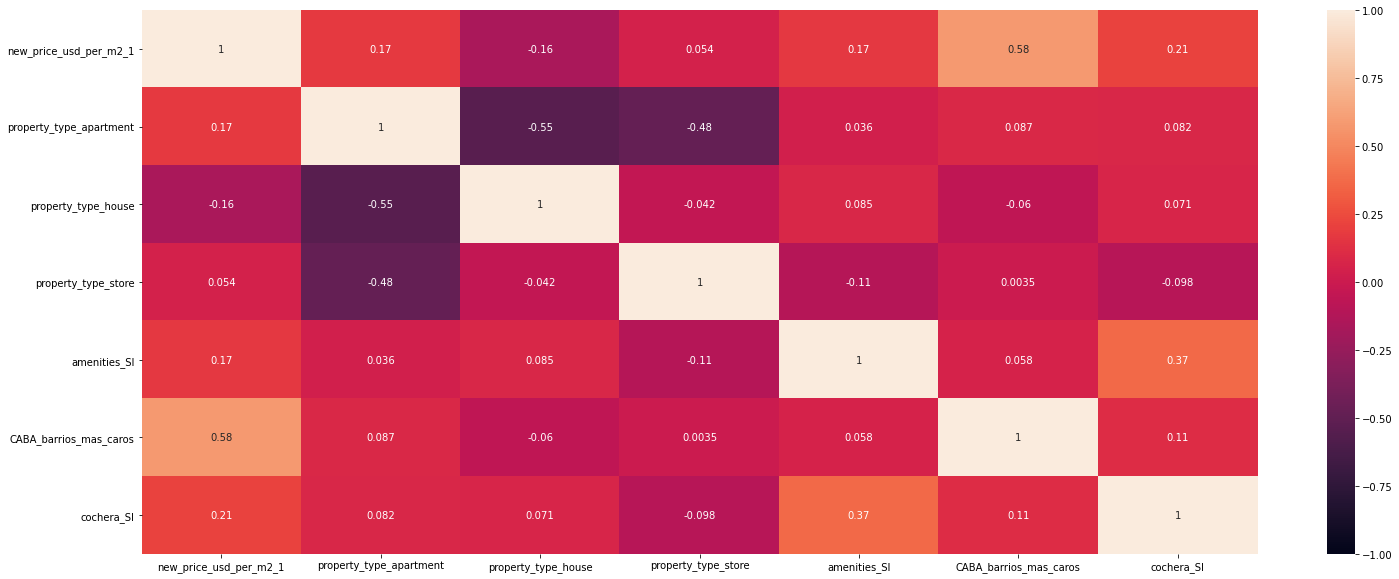

In [384]:
#Modificamos el tamaño del plot y generamos un heatmap de correlacion en CABA entre variables que consideramos a priri 
plt.figure(figsize = (25 , 10))
sns.heatmap(df_caba_dummies_drop[["new_price_usd_per_m2_1","property_type_apartment","property_type_house","property_type_store","amenities_SI","CABA_barrios_mas_caros"
                ,"cochera_SI"]].corr(), annot=True, vmin=-1)
print(df_pais.columns)



In [394]:
#copiamos el dataset para poder modificarlo
df_caba_scale = df_caba_dummies_drop
df_caba_minmax = df_caba_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_caba_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_caba_minmax[["new_price_usd_per_m2_1"]])
df_caba_minmax["property_type_apartment_n"] = scaler.fit_transform(df_caba_minmax[["property_type_apartment"]])
df_caba_minmax["property_type_house_n"] = scaler.fit_transform(df_caba_minmax[["property_type_house"]])
df_caba_minmax["property_type_store_n"] = scaler.fit_transform(df_caba_minmax[["property_type_store"]])
df_caba_minmax["amenities_SI_n"] = scaler.fit_transform(df_caba_minmax[["amenities_SI"]])
df_caba_minmax["cochera_SI_n"] = scaler.fit_transform(df_caba_minmax[["cochera_SI"]])
df_caba_minmax["CABA_barrios_mas_caros_n"] = scaler.fit_transform(df_caba_minmax[["CABA_barrios_mas_caros"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_caba_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_caba_scale["new_price_usd_per_m2_1"])
df_caba_scale["property_type_apartment_n"] = preprocessing.scale(df_caba_scale["property_type_apartment"])
df_caba_scale["property_type_house_n"] = preprocessing.scale(df_caba_scale["property_type_house"])
df_caba_scale["property_type_store_n"] = preprocessing.scale(df_caba_scale["property_type_store"])
df_caba_scale["amenities_SI_n"] = preprocessing.scale(df_caba_scale["amenities_SI"])
df_caba_scale["cochera_SI_n"] = preprocessing.scale(df_caba_scale["cochera_SI"])
df_caba_scale["CABA_barrios_mas_caros_n"] = preprocessing.scale(df_caba_scale["CABA_barrios_mas_caros"])

#dropeamos las variables excedentes
df_caba_minmax = df_caba_minmax.drop(["new_price_usd_per_m2_1","property_type_apartment","property_type_house","property_type_store","amenities_SI","cochera_SI","CABA_barrios_mas_caros"], axis=1)
df_caba_scale = df_caba_scale.drop(["new_price_usd_per_m2_1","property_type_apartment","property_type_house","property_type_store","amenities_SI","cochera_SI","CABA_barrios_mas_caros"], axis=1)
df_caba_dummies_drop = df_caba_dummies_drop.drop(["new_price_usd_per_m2_1_n","property_type_apartment_n","property_type_house_n","property_type_store_n","amenities_SI_n","cochera_SI_n"], axis=1) 
df_caba_dummies_drop



,surface_covered_in_m2,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,CABA_barrios_mas_caros,CABA_barrios_mas_caros_n
0,40.0,55.0,1127.272727,0,0,0,0,0,0.0,-0.428374
1,55.0,55.0,1309.090909,1,0,0,0,0,0.0,-0.428374
4,40.0,45.0,3066.666667,1,0,0,0,0,0.0,-0.428374
5,60.0,65.0,3000.000000,1,0,0,0,0,0.0,-0.428374
8,30.0,50.0,2234.000000,1,0,0,1,0,0.0,-0.428374
...,...,...,...,...,...,...,...,...,...,...
92660,NaN,157.0,2611.464968,1,0,0,0,0,0.0,-0.428374
92707,NaN,157.0,2611.464968,1,0,0,0,0,0.0,-0.428374
92708,93.0,113.0,7699.115044,1,0,0,1,1,0.0,-0.428374
92710,39.0,46.0,2858.695652,1,0,0,1,0,0.0,-0.428374


In [395]:
#Quitamos las variables que no vamos a incluir en el modelo

X_caba = df_caba_dummies_drop.drop(['new_price_usd_per_m2_1',"surface_total_in_m2_clean","surface_covered_in_m2","CABA_barrios_mas_caros"], axis=1)
y_caba = df_caba_dummies_drop["new_price_usd_per_m2_1"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_caba, y_caba, test_size=0.25, random_state=10)



In [396]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))



MAE: 573.2667930534313
MSE: 641679.5943561534
RMSE: 801.0490586450703
R2: 0.4063445069565491
Score model_1: 0.4063445069565491


In [397]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))


MAE: 573.2644811670123
MSE: 641676.221151742
RMSE: 801.0469531505266
R2: 0.4063476277061343
Score model_2: 0.4063476277061343


In [398]:
lm_ridge.alpha_

0.0005

In [399]:
#probamos el modelo Lasso
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25, 50],\
                                        normalize=True, cv=4)

model_3 = lm_lasso.fit(X_train, y_train)
y_pred = lm_lasso.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_3:', model_3.score(X_test,y_test))


MAE: 573.2668249138655
MSE: 641679.6141466263
RMSE: 801.0490709979173
R2: 0.40634448864721984
Score model_3: 0.40634448864721984


In [400]:
lm_lasso.alpha_

1e-05

# 2. BSAS Zona Sur

In [430]:
#generamos Dummies por cada variable cualitativas
df_bsas_sur_dummies = pd.get_dummies(data=df_bsas_sur,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_bsas_sur_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
54,61,sell,Fincas de Iraola,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,"-34.8222793407,-58.1808181479",-34.822279,-58.180818,460000.0,...,NaN,0.0,290.0,1586.206897,Fincas de Iraola,0,1,0,0,0
99,127,sell,Lanús Este,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús ...,Argentina,NaN,"-34.7114415818,-58.3792223609",-34.711442,-58.379222,120000.0,...,4.0,4.0,95.0,1263.157895,Lanús Este,0,1,0,0,0
103,131,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,"-34.7380101,-58.4038541",-34.738010,-58.403854,165000.0,...,NaN,0.0,80.0,2062.500000,Banfield,0,1,0,0,0
125,160,sell,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,3429651.0,"-34.732179,-58.271759",-34.732179,-58.271759,130000.0,...,3.0,3.0,94.0,1382.978723,Quilmes,0,0,0,0,0
197,261,sell,Las Golondrinas,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,330000.0,...,NaN,0.0,205.0,1609.756098,Las Golondrinas,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92617,121105,sell,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,3432039.0,NaN,NaN,NaN,69000.0,...,NaN,0.0,42.0,1642.857143,La Plata,1,0,0,0,0
92634,121130,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,95000.0,...,NaN,0.0,12.0,7916.666667,Banfield,0,0,0,0,0
92642,121140,sell,Altos de Hudson I,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,375000.0,...,NaN,0.0,213.0,1760.563380,Altos de Hudson I,0,1,0,1,0
92645,121145,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,290000.0,...,NaN,0.0,170.0,1705.882353,Banfield,0,1,0,1,1


In [431]:
#Creamos una variable que acumula el valor de los m2 de los barrios mas caros de CABA
suburb_values = ['Country Nuevo Quilmes', 'Uribelarrea', 'GreenVille Polo & Resort', 'Fincas de Hudson', 'Fincas de Iraola II']
data_suburb_mask = df_bsas_sur_dummies.place_name.apply(lambda x: x in suburb_values)
data_suburb = df_bsas_sur_dummies.loc[data_suburb_mask, :]
#creamos una columna nueva
data_suburb["BSAS_Sur_mas_caros"] = data_suburb["new_price_usd_per_m2_1"]
df_bsas_sur_dummies = pd.concat([df_bsas_sur_dummies,data_suburb["BSAS_Sur_mas_caros"]], axis = 1)

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [432]:
#Reemplazamos los nulos de la columna por valores cero
ambientes_134 = df_bsas_sur_dummies["BSAS_Sur_mas_caros"].isnull()
ambientes_134
df_bsas_sur_dummies.loc[ambientes_134, "BSAS_Sur_mas_caros"] = 0
df_rooms_unique = df_bsas_sur_dummies["BSAS_Sur_mas_caros"].unique()
df_rooms_unique
#print(df_rooms_unique)

array([    0.        ,  2333.33333333,  1944.44444444,  2156.25      ,
        1850.        ,  1833.33333333,  2574.62686567,  1842.10526316,
        3000.        ,  1988.63636364,  2045.45454545,  1266.66666667,
        1892.85714286,  2153.84615385,  1770.83333333,  1776.64974619,
        2465.75342466,  1869.56521739,  4500.        ,  2285.71428571,
        1884.05797101,   883.35220838,  2616.82242991,  2803.73831776,
        2850.46728972,  3368.42105263,  1971.80519481,  2741.93548387,
        2415.4589372 ,  2335.76642336,  1950.        ,  1727.27272727,
        1127.37920937,  1949.09090909,  1954.23684211,  1750.18343195,
        2004.96103896,  1727.80446927,  2092.22222222,  2872.72727273,
        2917.77188329,  1956.52173913,  2492.75362319,  2857.14285714,
        2015.50387597,  3250.        ,  1720.93023256,  1250.        ,
        2894.73684211,  2131.14754098,  2000.        ,  1901.4084507 ,
        1594.59459459,  2411.76470588,  2409.09090909,  2202.38095238,
      

In [433]:
#regularizacion de variables no numericas dropeandolas
df_bsas_sur_dummies_drop = df_bsas_sur_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0','new_rooms_clean',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [457]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_bsas_sur_dummies_drop = df_bsas_sur_dummies_drop[df_bsas_sur_dummies_drop['new_price_usd_per_m2_1'] < 4500]
df_bsas_sur_dummies_drop = df_bsas_sur_dummies_drop[df_bsas_sur_dummies_drop['new_price_usd_per_m2_1'] > 300]
#df_caba = df_caba.new_price_usd_per_m2_1
df_bsas_sur_dummies_drop

,surface_covered_in_m2,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,BSAS_Sur_mas_caros
54,220.0,290.0,1586.206897,0,1,0,0,0,-0.088353
99,95.0,95.0,1263.157895,0,1,0,0,0,-0.088353
103,70.0,80.0,2062.500000,0,1,0,0,0,-0.088353
125,94.0,94.0,1382.978723,0,0,0,0,0,-0.088353
197,175.0,205.0,1609.756098,0,1,0,1,0,-0.088353
...,...,...,...,...,...,...,...,...,...
92598,83.0,83.0,1626.506024,0,0,0,0,0,-0.088353
92617,42.0,42.0,1642.857143,1,0,0,0,0,-0.088353
92642,213.0,213.0,1760.563380,0,1,0,1,0,-0.088353
92645,170.0,170.0,1705.882353,0,1,0,1,1,-0.088353


In [458]:
#copiamos el dataset para poder modificarlo
df_bsas_sur_scale = df_bsas_sur_dummies_drop
df_bsas_sur_minmax = df_bsas_sur_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_bsas_sur_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_bsas_sur_minmax[["new_price_usd_per_m2_1"]])
df_bsas_sur_minmax["property_type_apartment_n"] = scaler.fit_transform(df_bsas_sur_minmax[["property_type_apartment"]])
df_bsas_sur_minmax["property_type_house_n"] = scaler.fit_transform(df_bsas_sur_minmax[["property_type_house"]])
df_bsas_sur_minmax["property_type_store_n"] = scaler.fit_transform(df_bsas_sur_minmax[["property_type_store"]])
df_bsas_sur_minmax["amenities_SI_n"] = scaler.fit_transform(df_bsas_sur_minmax[["amenities_SI"]])
df_bsas_sur_minmax["cochera_SI_n"] = scaler.fit_transform(df_bsas_sur_minmax[["cochera_SI"]])
df_bsas_sur_minmax["BSAS_Sur_mas_caros"] = scaler.fit_transform(df_bsas_sur_minmax[["BSAS_Sur_mas_caros"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_bsas_sur_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_bsas_sur_scale["new_price_usd_per_m2_1"])
df_bsas_sur_scale["property_type_apartment_n"] = preprocessing.scale(df_bsas_sur_scale["property_type_apartment"])
df_bsas_sur_scale["property_type_house_n"] = preprocessing.scale(df_bsas_sur_scale["property_type_house"])
df_bsas_sur_scale["property_type_store_n"] = preprocessing.scale(df_bsas_sur_scale["property_type_store"])
df_bsas_sur_scale["amenities_SI_n"] = preprocessing.scale(df_bsas_sur_scale["amenities_SI"])
df_bsas_sur_scale["cochera_SI_n"] = preprocessing.scale(df_bsas_sur_scale["cochera_SI"])
df_bsas_sur_scale["BSAS_Sur_mas_caros"] = preprocessing.scale(df_bsas_sur_scale["BSAS_Sur_mas_caros"])



In [459]:
#dropeamos las variables excedentes
df_bsas_sur_minmax = df_bsas_sur_minmax.drop(["new_price_usd_per_m2_1","property_type_apartment","property_type_house","property_type_store","amenities_SI","cochera_SI","BSAS_Sur_mas_caros"], axis=1)
df_bsas_sur_scale = df_bsas_sur_scale.drop(["new_price_usd_per_m2_1","property_type_apartment","property_type_house","property_type_store","amenities_SI","cochera_SI","BSAS_Sur_mas_caros"], axis=1)
df_bsas_sur_dummies_drop = df_bsas_sur_dummies_drop.drop(["new_price_usd_per_m2_1_n","property_type_apartment_n","property_type_house_n","property_type_store_n","amenities_SI_n","cochera_SI_n"], axis=1) 
df_bsas_sur_minmax


,surface_covered_in_m2,surface_total_in_m2_clean,new_price_usd_per_m2_1_n,property_type_apartment_n,property_type_house_n,property_type_store_n,amenities_SI_n,cochera_SI_n
54,220.0,290.0,-0.003455,-0.897088,1.09212,-0.197393,-0.708564,-0.772547
99,95.0,95.0,-0.543378,-0.897088,1.09212,-0.197393,-0.708564,-0.772547
103,70.0,80.0,0.792590,-0.897088,1.09212,-0.197393,-0.708564,-0.772547
125,94.0,94.0,-0.343118,-0.897088,-0.91565,-0.197393,-0.708564,-0.772547
197,175.0,205.0,0.035903,-0.897088,1.09212,-0.197393,1.411305,-0.772547
...,...,...,...,...,...,...,...,...
92598,83.0,83.0,0.063898,-0.897088,-0.91565,-0.197393,-0.708564,-0.772547
92617,42.0,42.0,0.091226,1.114718,-0.91565,-0.197393,-0.708564,-0.772547
92642,213.0,213.0,0.287953,-0.897088,1.09212,-0.197393,1.411305,-0.772547
92645,170.0,170.0,0.196562,-0.897088,1.09212,-0.197393,1.411305,1.294420


In [474]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_sur = df_bsas_sur_minmax.drop(["surface_total_in_m2_clean","surface_covered_in_m2","new_price_usd_per_m2_1_n"], axis=1)
y_bsas_sur = df_bsas_sur_minmax["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_sur, y_bsas_sur, test_size=0.25, random_state=10)

X_bsas_sur

,property_type_apartment_n,property_type_house_n,property_type_store_n,amenities_SI_n,cochera_SI_n
54,-0.897088,1.09212,-0.197393,-0.708564,-0.772547
99,-0.897088,1.09212,-0.197393,-0.708564,-0.772547
103,-0.897088,1.09212,-0.197393,-0.708564,-0.772547
125,-0.897088,-0.91565,-0.197393,-0.708564,-0.772547
197,-0.897088,1.09212,-0.197393,1.411305,-0.772547
...,...,...,...,...,...
92598,-0.897088,-0.91565,-0.197393,-0.708564,-0.772547
92617,1.114718,-0.91565,-0.197393,-0.708564,-0.772547
92642,-0.897088,1.09212,-0.197393,1.411305,-0.772547
92645,-0.897088,1.09212,-0.197393,1.411305,1.294420


In [475]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))



MAE: 0.7023216787797517
MSE: 0.8285907920768473
RMSE: 0.9102696260322253
R2: 0.17326518519661416
Score model_1: 0.17326518519661416


In [476]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.7023233951846161
MSE: 0.8285907321557796
RMSE: 0.9102695931183132
R2: 0.1732652449834634
Score model_2: 0.1732652449834634
